# Assignment 7

Use bike sharing data set to implement the following :

#### Exercise 1

* Is there a correlation between the temp / atemp / mean temp and total count of bike rentals ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading data

d1 = pd.read_csv("H:\M.tech Data science PDPU\PRML LAB\CSV\hour.csv", sep=",")
df1 = pd.DataFrame(d1)

d2 = pd.read_csv("H:\M.tech Data science PDPU\PRML LAB\CSV\day.csv", sep=",")
df2 = pd.DataFrame(d2)

In [3]:
df = pd.concat((df1,df2), axis=0, join='inner')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# Calculate correlation
correlation_matrix = df1[['temp', 'atemp', 'casual']].corr()
print(correlation_matrix)

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000


#### Exercise 2

* Can the number of total bike rentals be predicted by whether or not it is a holiday and the weather is good ?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [6]:
# filtering data where weather is good, like 1 and 2

df_good_weather = df[df['weathersit'].isin([1, 2])]
df_good_weather

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [7]:
x = df_good_weather[['holiday', 'weathersit']]
y = df_good_weather['cnt']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
predictions = model.predict(x_test)

rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 953.802771334585


#### Exercise 3

* Can the number of total bike rentals be predicted by holiday and weather ?

In [11]:
# filtering data where there is a holiday

df_is_holiday = df[df['holiday'] == 1]
df_is_holiday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
372,373,2011-01-17,1,0,1,1,1,0,2,0.200000,0.197000,0.470000,0.223900,1,16,17
373,374,2011-01-17,1,0,1,1,1,0,2,0.200000,0.197000,0.440000,0.194000,1,15,16
374,375,2011-01-17,1,0,1,1,1,0,2,0.180000,0.166700,0.430000,0.253700,0,8,8
375,376,2011-01-17,1,0,1,1,1,0,2,0.180000,0.181800,0.430000,0.194000,0,2,2
376,377,2011-01-17,1,0,1,1,1,0,2,0.180000,0.197000,0.430000,0.134300,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,612,2012-09-03,3,1,9,1,1,0,1,0.707500,0.661629,0.790833,0.151121,1965,4069,6034
646,647,2012-10-08,4,1,10,1,1,0,2,0.383333,0.387608,0.709583,0.189679,874,4604,5478
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
691,692,2012-11-22,4,1,11,1,4,0,1,0.340000,0.350371,0.580417,0.052871,955,1470,2425


In [12]:
x = df_is_holiday[['weathersit']]
y = df_is_holiday['cnt']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
predictions = model.predict(x_test)

rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 762.5017436307575


#### Exercise 4

* Are weather and holiday good predictor ?

In [16]:
X = df[['holiday', 'weathersit']]
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coef_holiday = model.coef_[0]
coef_weathersit = model.coef_[1]

print("coefficient of holiday: " ,coef_holiday)
print("coefficient of weathersit: " ,coef_weathersit)

coefficient of holiday:  -87.51953655903039
coefficient of weathersit:  -83.7160591907163


* Coefficient of 'holiday': -87.52

The negative coefficient of -87.52 for the 'holiday' variable indicates that, on average, there is a decrease of approximately 87.52 bike rentals when it is a holiday (holiday = 1) compared to regular days (holiday = 0). This suggests that bike rentals tend to be lower on holidays than on non-holiday days.

-------------------------------------------------------------------------------------------------------------------------------

* Coefficient of 'weathersit': -83.72

The negative coefficient of -83.72 for the 'weathersit' variable suggests that as weather conditions worsen (higher 'weathersit' values), there is an associated decrease of approximately 83.72 bike rentals. In other words, people are less likely to rent bikes in unfavorable weather conditions, which is reflected by the negative coefficient.

-------------------------------------------------------------------------------------------------------------------------------

* In conclusion, based on the coefficient values, the linear regression model indicates that both 'holiday' and 'weathersit' variables are significant predictors for predicting bike rentals, with negative coefficients suggesting a decrease in bike rentals during holidays and unfavorable weather conditions.

-------------------------------------------------------------------------------------------------------------------------------

#### Exercise 5

* Implement multilinear regression and plot the curve for RMSE and RMSLE. which curve gives you better information ?

In [17]:
x = df[['holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(x_train1, y_train1)

LinearRegression()

In [20]:
predictions = model.predict(x_test1)

In [21]:
rmse = mean_squared_error(y_test1, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 963.3731270407177


In [22]:
rmsle = np.sqrt(mean_squared_log_error(y_test1, predictions))
print("Root Mean Squared Logarithmic Error:", rmsle)

Root Mean Squared Logarithmic Error: 1.7851816220159158


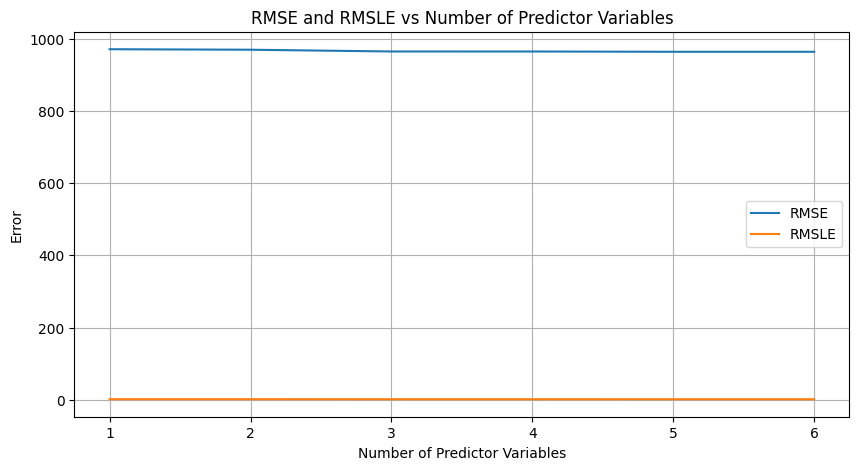

In [23]:
rmse_values = []
rmsle_values = []

predictor_columns = ['holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

for num_features in range(1, len(predictor_columns) + 1):
    x_subset_train = x_train1[predictor_columns[:num_features]]
    x_subset_test = x_test1[predictor_columns[:num_features]]
    
    model = LinearRegression()
    model.fit(x_subset_train, y_train1)
    
    # Predictions on the testing data
    predictions = model.predict(x_subset_test)
    
    # Calculate RMSE and RMSLE
    rmse = mean_squared_error(y_test1, predictions, squared=False)
    rmsle = np.sqrt(mean_squared_log_error(y_test1, predictions))
    
    # Append RMSE and RMSLE values to the lists
    rmse_values.append(rmse)
    rmsle_values.append(rmsle)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(predictor_columns) + 1), rmse_values, label='RMSE')
plt.plot(range(1, len(predictor_columns) + 1), rmsle_values, label='RMSLE')
plt.xlabel('Number of Predictor Variables')
plt.ylabel('Error')
plt.title('RMSE and RMSLE vs Number of Predictor Variables')
plt.legend()
plt.grid()
plt.show()